<a href="https://colab.research.google.com/github/mohitsbh/Ai_Learn_codes/blob/main/Rnnproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences  # Fixed: pad_sequences
from tensorflow.keras.layers import LSTM, Dense, SimpleRNN, GRU, Embedding
from tensorflow.keras.models import Sequential
import numpy as np

vocab_size = 10000
max_len = 200

# Load and pad data
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)  # Fixed: num_words
X_train = pad_sequences(X_train, maxlen=max_len, padding='post')
X_test = pad_sequences(X_test, maxlen=max_len, padding='post')

print("Train shape:", X_train.shape)  # (25000, 200)
print("Test shape:", X_test.shape)    # (25000, 200)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (25000, 200)
Test shape: (25000, 200)


In [3]:
# SimpleRNN Model (Fixed)
rnn_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128),
    SimpleRNN(128, activation="tanh", return_sequences=False),  # Fixed comma
    Dense(1, activation="sigmoid")
])
rnn_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])
rnn_model.summary()
rnn_history = rnn_model.fit(X_train, y_train, epochs=1, batch_size=32, validation_split=0.2, verbose=1)

# LSTM Model (Fixed)
lstm_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128),
    LSTM(128, activation="tanh", return_sequences=False),
    Dense(1, activation="sigmoid")
])
lstm_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
lstm_model.summary()
lstm_history = lstm_model.fit(X_train, y_train, epochs=1, batch_size=32, validation_split=0.2, verbose=1)

# GRU Model (Fixed syntax)
gru_model = Sequential([  # Fixed: Sequential([...])
    Embedding(input_dim=vocab_size, output_dim=128),  # Fixed: Embedding(
    GRU(128, activation="tanh", return_sequences=False),  # Fixed: return_sequences
    Dense(1, activation="sigmoid")
])
gru_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
gru_model.summary()
gru_history = gru_model.fit(X_train, y_train, epochs=1, batch_size=32, validation_split=0.2, verbose=1)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 88ms/step - accuracy: 0.5070 - loss: 0.6984 - val_accuracy: 0.5300 - val_loss: 0.6873


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

625/625 ━━━━━━━━━━━━━━━━━━━━ 196s 310ms/step - accuracy: 0.5390 - loss: 0.6837 - val_accuracy: 0.5592 - val_loss: 0.6680


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

625/625 ━━━━━━━━━━━━━━━━━━━━ 160s 252ms/step - accuracy: 0.5432 - loss: 0.6790 - val_accuracy: 0.8178 - val_loss: 0.4661


RNN - Loss: 0.6892, Accuracy: 0.5223
LSTM - Loss: 0.6682, Accuracy: 0.5614
GRU - Loss: 0.4838, Accuracy: 0.8038


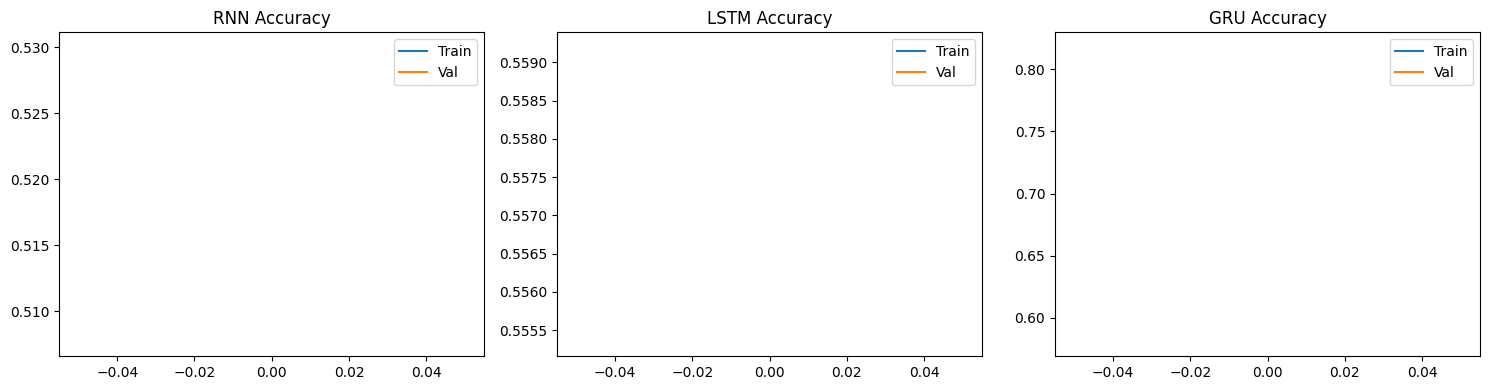

In [5]:
# Evaluate all models
for name, model in [("RNN", rnn_model), ("LSTM", lstm_model), ("GRU", gru_model)]:
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"{name} - Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

# Plot training history (add this for visualization)
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for i, (name, hist) in enumerate([("RNN", rnn_history), ("LSTM", lstm_history), ("GRU", gru_history)]):
    axes[i].plot(hist.history['accuracy'], label='Train')
    axes[i].plot(hist.history['val_accuracy'], label='Val')
    axes[i].set_title(f"{name} Accuracy")
    axes[i].legend()
plt.tight_layout()
plt.show()